Diamond https://github.com/bbuchfink/diamond 
* diamond makedb --in /Users/alsalas/Database/uniprot/uniprot_sprot_2021_4.fasta -d sprot_2021_4`
* diamond blastp -d sprot_2021_4 -q ./Fungi_fastas/Antifungal_DRAMP3_2022_1802.fa -o DRAMP3.tsv  —ultra-sensitive`
* diamond blastp -d trembl_2021_4 -q ../Fungi_fastas/Antifungal_DRAMP3_2022_1802.fa -o DRAMP3_tr.tsvr --sensitive`

In [8]:
#Read TSV from Diamond
import os
diamond  = os.listdir("02_Diamond_SwissProt")
diamond  = [x for x in diamond if x[-3:]=="tsv"]
diamond

['APD3.tsv',
 'CAMPR3.tsv',
 'DBAASP3.tsv',
 'DRAMP3.tsv',
 'EROP.tsv',
 'LPDB.tsv',
 'PAMP.tsv',
 'PPDB.tsv',
 'SATPDB.tsv']

In [9]:
import pandas as pd
df = pd.read_csv("02_Diamond_SwissProt/"+diamond[0], sep='\t', header=None)
df['DataBases']=diamond[0].split(".")[0]
df

,0,1,2,3,4,5,6,7,8,9,10,11,DataBases
0,AP00003,sp|P0C8Y5|DEF1_HEUSA,100.0,54,0,0,1,54,1,54,7.210000e-40,127.0,APD3
1,AP00003,sp|P30224|DEF13_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3
2,AP00003,sp|O80995|DEF14_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3
3,AP00003,sp|O80994|DEF15_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3
4,AP00003,sp|Q9FI23|DEF16_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,AP03324,sp|Q2WCN8|PELO1_PELFU,60.0,30,12,0,1,30,44,73,5.880000e-06,40.8,APD3
9594,AP03324,sp|Q1JS90|RN2VB_ODOVE,72.0,25,7,0,3,27,41,65,1.210000e-04,37.4,APD3
9595,AP03324,sp|Q2WCN7|PELO2_PELFU,53.3,30,14,0,1,30,45,74,2.780000e-04,36.6,APD3
9596,AP03324,sp|P82840|RN2B_LITBE,60.0,25,10,0,3,27,2,26,6.840000e-04,34.7,APD3


In [10]:
df2 = pd.DataFrame()
for dfile in diamond:
    import pandas as pd
    df = pd.read_csv("02_Diamond_SwissProt/"+dfile, sep='\t', header=None)
    df['DataBases']=dfile.split(".")[0]
    df2 = pd.concat([df2,df])
df2.columns=['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore','DataBases']

#Split the name from Uniprot
df21 = df2['sseqid'].str.split('|', expand=True).drop(0, 1)
df22 = df21[2].str.split('_', expand=True)
df2['Code_SP'] = df21[1]
df2['Name_SP'] = df22[0]
df2['Organism_SP'] = df22[1]
df2

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,DataBases,Code_SP,Name_SP,Organism_SP
0,AP00003,sp|P0C8Y5|DEF1_HEUSA,100.0,54,0,0,1,54,1,54,7.210000e-40,127.0,APD3,P0C8Y5,DEF1,HEUSA
1,AP00003,sp|P30224|DEF13_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3,P30224,DEF13,ARATH
2,AP00003,sp|O80995|DEF14_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3,O80995,DEF14,ARATH
3,AP00003,sp|O80994|DEF15_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3,O80994,DEF15,ARATH
4,AP00003,sp|Q9FI23|DEF16_ARATH,52.9,51,23,1,4,54,31,80,1.410000e-12,58.9,APD3,Q9FI23,DEF16,ARATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,satpdb29131,sp|Q1JS88|PA3B_ODOVE,43.6,39,22,0,1,39,39,77,1.240000e-04,38.5,SATPDB,Q1JS88,PA3B,ODOVE
9423,satpdb29166,sp|P61507|LYT1_HOGCA,100.0,24,0,0,1,24,1,24,2.780000e-10,50.4,SATPDB,P61507,LYT1,HOGCA
9424,satpdb29166,sp|C0HJU9|LYT1_LYCER,83.3,24,4,0,1,24,1,24,2.200000e-07,43.1,SATPDB,C0HJU9,LYT1,LYCER
9425,satpdb29178,sp|P61507|LYT1_HOGCA,100.0,25,0,0,1,25,1,25,7.150000e-11,52.0,SATPDB,P61507,LYT1,HOGCA


In [11]:
df2 = df2.drop_duplicates(subset=['qseqid','DataBases'], keep='first')
df2

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,DataBases,Code_SP,Name_SP,Organism_SP
0,AP00003,sp|P0C8Y5|DEF1_HEUSA,100.0,54,0,0,1,54,1,54,7.210000e-40,127.0,APD3,P0C8Y5,DEF1,HEUSA
25,AP00004,sp|Q7M1F2|DEF1_CLITE,98.0,49,1,0,1,49,1,49,8.300000e-37,119.0,APD3,Q7M1F2,DEF1,CLITE
50,AP00014,sp|P69017|AUR21_RANAE,100.0,16,0,0,1,16,1,16,1.650000e-04,35.4,APD3,P69017,AUR21,RANAE
53,AP00015,sp|P82389|AUR22_RANAE,100.0,16,0,0,1,16,50,65,3.820000e-04,35.4,APD3,P82389,AUR22,RANAE
56,AP00017,sp|P82391|AUR24_RANAE,93.8,16,1,0,1,16,1,16,9.490000e-04,33.5,APD3,P82391,AUR24,RANAE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379,satpdb29106,sp|P80400|GGN6_GLARU,100.0,24,0,0,1,24,1,24,1.370000e-10,51.2,SATPDB,P80400,GGN6,GLARU
9404,satpdb29112,sp|B6CPR5|B1PLA_LITPA,96.0,25,0,1,1,25,21,44,1.120000e-09,49.3,SATPDB,B6CPR5,B1PLA,LITPA
9406,satpdb29131,sp|F1T149|ES1IA_ODOIS,84.8,46,7,0,1,46,39,84,4.910000e-23,85.1,SATPDB,F1T149,ES1IA,ODOIS
9423,satpdb29166,sp|P61507|LYT1_HOGCA,100.0,24,0,0,1,24,1,24,2.780000e-10,50.4,SATPDB,P61507,LYT1,HOGCA


In [5]:
df2.describe()

,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
count,6724.000000,6724.000000,6724.000000,6724.000000,6724.000000,6724.000000,6724.000000,6724.000000,6.724000e+03,6724.000000
mean,93.180518,36.053688,2.405265,0.047591,1.317519,36.325402,33.229774,68.239143,2.668833e-05,73.797487
std,11.920391,24.199108,5.657678,0.270733,2.423087,24.323762,89.540161,92.294365,1.135046e-04,50.002956
min,31.500000,12.000000,0.000000,0.000000,1.000000,12.000000,1.000000,13.000000,4.810000e-203,33.500000
25%,90.900000,23.000000,0.000000,0.000000,1.000000,23.000000,1.000000,33.000000,3.875000e-25,44.700000
50%,100.000000,30.000000,0.000000,0.000000,1.000000,30.000000,22.000000,58.000000,8.740000e-13,58.200000
75%,100.000000,44.000000,2.000000,0.000000,1.000000,44.000000,42.000000,76.000000,9.290000e-08,89.700000
max,100.000000,258.000000,82.000000,5.000000,82.000000,255.000000,2322.000000,2391.000000,9.930000e-04,558.000000


In [19]:
df2.to_csv('02_Diamond_SwissProt/CAFPdb_blastHIT_organism.csv')

In [6]:
df2[['DataBases','pident']].groupby('DataBases').describe()

pident                                                            
            count        mean        std    min      25%    50%    75%    max
DataBases                                                                    
APD3        848.0   91.908255  13.826473   31.5   87.900  100.0  100.0  100.0
CAMPR3      874.0   94.522540  11.305321   35.0   95.550  100.0  100.0  100.0
DBAASP3    1790.0   91.620000  12.265749   35.0   87.825   96.3  100.0  100.0
DRAMP3     1329.0   95.204515  10.153164   37.1   95.700  100.0  100.0  100.0
EROP        504.0   90.772024  13.855221   39.1   83.750  100.0  100.0  100.0
LPDB          3.0  100.000000   0.000000  100.0  100.000  100.0  100.0  100.0
PAMP         80.0   94.538750  11.304849   57.8   97.800  100.0  100.0  100.0
PPDB        424.0   93.224292  11.963890   37.1   91.500  100.0  100.0  100.0
SATPDB      872.0   94.413991  10.236428   48.8   93.900  100.0  100.0  100.0

In [7]:
df2[['DataBases','sseqid']].groupby('DataBases').describe()

sseqid                                   
           count unique                    top freq
DataBases                                          
APD3         848    598  sp|P85071|NIG2A_ODOGR   10
CAMPR3       874    631   sp|P84156|DEFN_ARCDE   14
DBAASP3     1790    778   sp|P69136|TAC1_CARRO   33
DRAMP3      1329    978   sp|P69136|TAC1_CARRO   31
EROP         504    365   sp|P15516|HIS3_HUMAN    7
LPDB           3      3  sp|Q10ED2|KNOS8_ORYSJ    1
PAMP          80     66    sp|O24006|AMP_IMPBA    4
PPDB         424    262    sp|P18646|DEF_VIGUN   13
SATPDB       872    552   sp|P84156|DEFN_ARCDE   15

In [8]:
df2[['DataBases','qseqid','sseqid','Code_SP','Name_SP','Organism_SP']].groupby('DataBases').describe()

qseqid                                                            \
           count unique                                                top   
DataBases                                                                    
APD3         848    848                                            AP02994   
CAMPR3       874    874                                         CAMPSQ3564   
DBAASP3     1790   1790                                      DBASSP3_10833   
DRAMP3      1329   1329                                         DRAMP01452   
EROP         504    504  E08747|HeveinlikepeptideEeCBPb|Europeanspindle...   
LPDB           3      3                                      LPDB_P2020034   
PAMP          80     80                                          PHYT00189   
PPDB         424    424                                        PPepDB_1543   
SATPDB       872    872                                        satpdb27690   

               sseqid                                    Code_SP         \
          freq  count unique                    top freq   count unique   
DataBases                                                                 
APD3         1    848    598  sp|P85071|NIG2A_ODOGR   10     848    598   
CAMPR3       1    874    631   sp|P84156|DEFN_ARCDE   14     874    631   
DBAASP3      1   1790    778   sp|P69136|TAC1_CARRO   33    1790    778   
DRAMP3       1   1329    978   sp|P69136|TAC1_CARRO   31    1329    978   
EROP         1    504    365   sp|P15516|HIS3_HUMAN    7     504    365   
LPDB         1      3      3  sp|Q10ED2|KNOS8_ORYSJ    1       3      3   
PAMP         1     80     66    sp|O24006|AMP_IMPBA    4      80     66   
PPDB         1    424    262    sp|P18646|DEF_VIGUN   13     424    262   
SATPDB       1    872    552   sp|P84156|DEFN_ARCDE   15     872    552   

                       Name_SP                   Organism_SP                \
              top freq   count unique   top freq       count unique    top   
DataBases                                                                    
APD3       Q2UXR4   10     848    480  DEF1   29         848    274  HUMAN   
CAMPR3     P84156   14     874    515  DEF1   26         874    266  BOMMX   
DBAASP3    P69136   33    1790    627  TAC1   35        1790    333  HUMAN   
DRAMP3     P69136   31    1329    801  DEF1   37        1329    298  ARATH   
EROP       P15516    7     504    289  DEF1   28         504    178  HUMAN   
LPDB       Q8S628    1       3      3  CASB    1           3      2  ORYSJ   
PAMP       O24006    4      80     45   AMP   10          80     38  TRIKH   
PPDB       P18646   13     424    185  DEF1   35         424    108  ARATH   
SATPDB     P84156   15     872    430  DEF1   26         872    252  HUMAN   

                
          freq  
DataBases       
APD3        51  
CAMPR3      39  
DBAASP3    110  
DRAMP3     287  
EROP        25  
LPDB         2  
PAMP         8  
PPDB        27  
SATPDB      38

In [9]:
# Count the Unique Swissprot Codes by Database
SP_unique = []
SP_DB = []
for db in diamond:
    db = db.split(".")[0]
    df3 = df2.loc[df2['DataBases']==db]
    print(db, len(df3['Code_SP'].unique()))
    SP_unique.append(list(df3['Code_SP'].unique()))
    SP_DB.append(list(df3['Code_SP']))

#Note: These plots not represent all commun sequences, the set select only the unique code for database

APD3 598
CAMPR3 631
DBAASP3 778
DRAMP3 978
EROP 365
LPDB 3
PAMP 66
PPDB 262
SATPDB 552


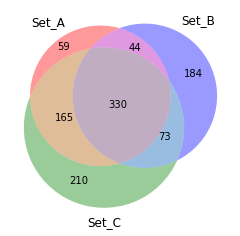

In [10]:
#!pip3 install matplotlib-venn
# Posee el limite de 3 subsets
from matplotlib_venn import venn3
from matplotlib import pyplot as plt


# Venn3
set_a = set(SP_unique[0])
set_b = set(SP_unique[1])
set_c = set(SP_unique[2])

venn3(subsets=[set_a, set_b, set_c],
      set_labels=['Set_A', 'Set_B', 'Set_C'],
      set_colors=['red', 'blue', 'green'])

plt.show()

In [11]:
#https://github.com/LankyCyril/pyvenn/blob/master/pyvenn-demo.ipynb
!pip3 install venn

In [12]:
from venn import venn
DB = list(df2['DataBases'].unique())
set_a = set(SP_unique[0])
set_b = set(SP_unique[1])
set_c = set(SP_unique[2])
set_d = set(SP_unique[3])
set_e = set(SP_unique[4])
set_f = set(SP_unique[8])
# With 5 Databases
data1 = {DB[0]:set_a, DB[1]:set_b, DB[2]:set_c, DB[3]:set_d,DB[4]:set_e}
# # With 6 Databases
data2 = {DB[0]:set_a, DB[1]:set_b, DB[2]:set_c, DB[3]:set_d,DB[4]:set_e,DB[8]:set_f}

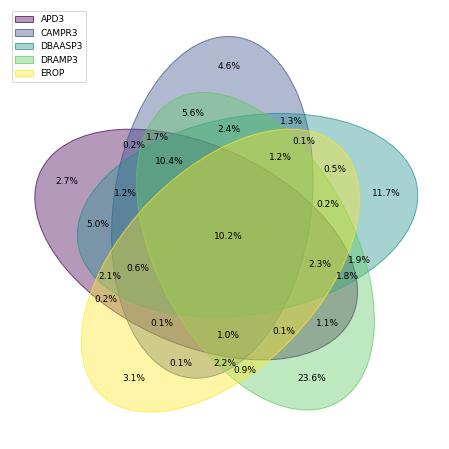

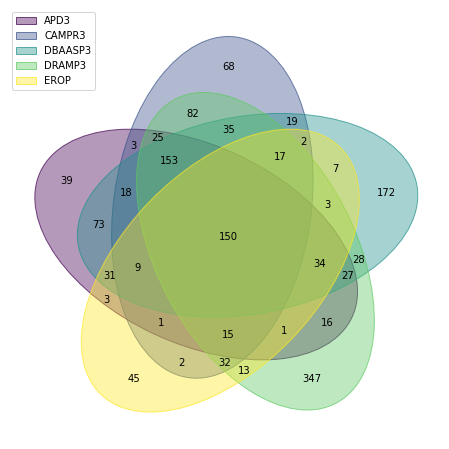

In [13]:
venn(data1,fmt="{percentage:.1f}%", cmap="viridis", fontsize=9, legend_loc="upper left")
venn(data1, cmap="viridis", fontsize=10, legend_loc="upper left")

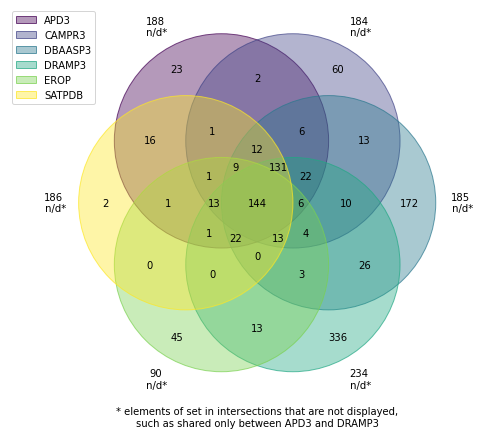

In [14]:
from venn import pseudovenn
plot04 = pseudovenn(data2, cmap="viridis",fontsize=10, legend_loc="upper left")
plot04.figure.savefig("02_Diamond_SwissProt/04plot_RedundancySP.svg")
plot04.figure.savefig("02_Diamond_SwissProt/04plot_RedundancySP.png")
plot04

In [15]:
# Count the Unique Organism Codes by Database
O_unique = []
for db in diamond:
    db = db.split(".")[0]
    df3 = df2.loc[df2['DataBases']==db]
    print(db, len(df3['Organism_SP'].unique()))
    O_unique.append(list(df3['Organism_SP'].unique()))

#Note: These plots not represent all commun sequences, the set select only the unique code for database

APD3 274
CAMPR3 266
DBAASP3 333
DRAMP3 298
EROP 178
LPDB 2
PAMP 38
PPDB 108
SATPDB 252


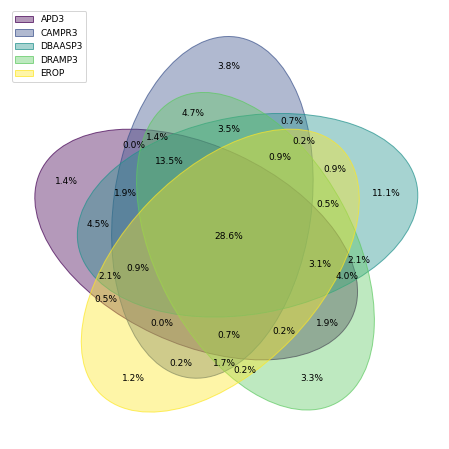

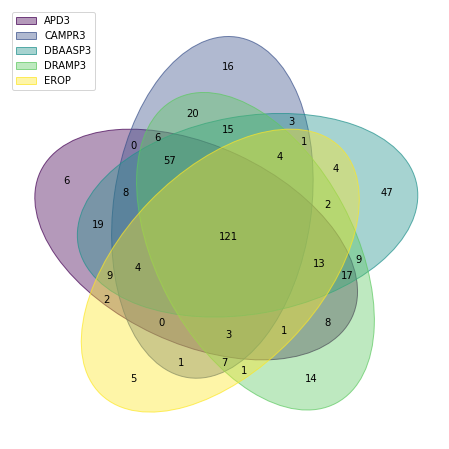

In [16]:
from venn import venn
DB = list(df2['DataBases'].unique())
set_a = set(O_unique[0])
set_b = set(O_unique[1])
set_c = set(O_unique[2])
set_d = set(O_unique[3])
set_e = set(O_unique[4])
set_f = set(O_unique[8])
data1 = {DB[0]:set_a, DB[1]:set_b, DB[2]:set_c, DB[3]:set_d,DB[4]:set_e}
data2 = {DB[0]:set_a, DB[1]:set_b, DB[2]:set_c, DB[3]:set_d,DB[4]:set_e,DB[8]:set_f}
venn(data1,fmt="{percentage:.1f}%", cmap="viridis", fontsize=9, legend_loc="upper left")
venn(data1, cmap="viridis", fontsize=10, legend_loc="upper left")

## Stage 2: Analysis from Organism Sources

In [17]:
df3 = df2.sort_values(['Organism_SP'],ascending=False).groupby(['DataBases','Organism_SP']).count()
df3

qseqid  sseqid  pident  length  mismatch  gapopen  \
DataBases Organism_SP                                                      
APD3      ACAGO             1       1       1       1         1        1   
          ACIGU             1       1       1       1         1        1   
          ACRLO             4       4       4       4         4        4   
          ACULO             1       1       1       1         1        1   
          AEDAE             1       1       1       1         1        1   
...                       ...     ...     ...     ...       ...      ...   
SATPDB    XENBO             6       6       6       6         6        6   
          XENBU             2       2       2       2         2        2   
          XENLA             2       2       2       2         2        2   
          XENRU             4       4       4       4         4        4   
          XENTR            14      14      14      14        14       14   

                       qstart  qend  sstart  send  evalue  bitscore  Code_SP  \
DataBases Organism_SP                                                          
APD3      ACAGO             1     1       1     1       1         1        1   
          ACIGU             1     1       1     1       1         1        1   
          ACRLO             4     4       4     4       4         4        4   
          ACULO             1     1       1     1       1         1        1   
          AEDAE             1     1       1     1       1         1        1   
...                       ...   ...     ...   ...     ...       ...      ...   
SATPDB    XENBO             6     6       6     6       6         6        6   
          XENBU             2     2       2     2       2         2        2   
          XENLA             2     2       2     2       2         2        2   
          XENRU             4     4       4     4       4         4        4   
          XENTR            14    14      14    14      14        14       14   

                       Name_SP  
DataBases Organism_SP           
APD3      ACAGO              1  
          ACIGU              1  
          ACRLO              4  
          ACULO              1  
          AEDAE              1  
...                        ...  
SATPDB    XENBO              6  
          XENBU              2  
          XENLA              2  
          XENRU              4  
          XENTR             14  

[1749 rows x 14 columns]

In [18]:
df3 = df3.reset_index()

In [19]:
# These value select the more abundant element in the table, to prevent the plots extend with results with one element
df3 = df3.sort_values(['Code_SP'],ascending=False).groupby('DataBases').head(30)

In [20]:
df33 = df3.loc[df3['DataBases']!='LPDB']#.loc[df3['DataBases']!='PAMP']#.loc[df3['DataBases']!='EROP'].loc[df3['DataBases']!='PPDB']
df33.shape

(240, 16)

In [21]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [22]:
bar_chart2 = alt.Chart(df33, title="Peptides Organisms Sources").mark_bar(color='seagreen',
 opacity=0.6
).encode(
    x=alt.X('Organism_SP'),# sort=None),
    y=alt.Y("Code_SP:Q", scale=alt.Scale(type='log')),
    #y2=alt.Y2("Composition SP:Q"),
    color = alt.Color('Organism_SP:N', legend=None),
    #column='DataBases:N',
    tooltip=['Code_SP:Q','Organism_SP:N']
).properties(
    width=1000,
    height=100
).facet(
    facet='DataBases:N',
    columns=1
)

bar_chart2.save("02_Diamond_SwissProt/"+"05plot_PeptideSources.html")
bar_chart2.save("02_Diamond_SwissProt/"+"05plot_PeptideSources.svg")
bar_chart2.save("02_Diamond_SwissProt/"+"05plot_PeptideSources.png")
bar_chart2

alt.FacetChart(...)

## Function to analyze taxonomy from Swiss Prot

In [12]:
def create_entry(taxid=6239):    
    import requests as rq
    from bs4 import BeautifulSoup
    url = "https://www.uniprot.org/taxonomy/%d"%(taxid)
    page = rq.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    import re
    pattern1 = ('\ti(\w+.{2,})T')
    pattern2 = ('\ti(\w+)\n')
    texto = soup.text
    #print(re.findall(pattern1, texto))
    organism = re.findall(pattern1, texto)[-1]
    
    mnemonic = re.findall(pattern2, texto)[0]
    return organism, mnemonic

def get_lineage(taxid=6239):
    import requests as rq
    from bs4 import BeautifulSoup
    url = "https://www.uniprot.org/taxonomy/%d"%(taxid)
    page = rq.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    lineage = []
    lineage_codes = []
    for link in soup.find_all('a', resource=True):
        lineage.append(link.text),
        lineage_codes.append(link['href'])

    return lineage, lineage_codes

def get_taxid(mnemonic='CAEEL'):
    import requests as rq
    from bs4 import BeautifulSoup
    url = "https://www.uniprot.org/taxonomy/?query=mnemonic%3A{0}&sort=score".format(mnemonic)
    page = rq.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    for url in soup.find_all('a', href=True):
        if url.attrs['href'].startswith('/taxonomy/'):
            taxid = url.attrs['href'].split('/')[-1]
    return int(taxid)

## Create a table with Organism name expand

In [13]:
taxid = get_taxid(mnemonic='ORYSJ')
create_entry(taxid)

('Oryza sativa subsp. japonica', 'ORYSJ')

In [18]:
df2['Organism_SP'].unique()

array(['HEUSA', 'CLITE', 'RANAE', 'RANRN', 'BOVIN', 'HELVI', 'BOMOR',
       'BOMVA', 'BOMMX', 'BOMPE', 'PELRI', 'PELLE', 'GLARU', 'PODMA',
       'SORBI', 'LITCT', 'RANLU', 'LITBE', 'LITPI', 'LITCL', 'ANTPE',
       'CERCA', 'XENRU', 'APICC', 'ASPGI', 'PIG', 'ANDAU', 'TACTR',
       'SHEEP', 'PHYSA', 'PSEAM', 'DROME', 'CAVPO', 'MACFA', 'HUMAN',
       'MAIZE', 'RABIT', 'ACAGO', 'AMACA', 'MIRJA', 'LIMPO', 'RAT',
       'RANCH', 'RANGE', 'CHICK', 'IPONI', 'MOUSE', 'CHACT', 'CHAPA',
       'STYCL', 'PSYLO', 'GORGO', 'DOLAU', 'SINAL', 'RAPSA', 'SPIOL',
       'PHYBI', 'BUFGR', 'SPHLA', 'ICTPU', 'MESCR', 'LITRO', 'RANCI',
       'GINBI', 'OPICA', 'NEOGO', 'PARSC', 'PENVA', 'PSEUS', 'VIGUN',
       'PENST', 'XENTR', 'MACIN', 'AESHI', 'LEIHE', 'MESAU', 'MACMU',
       'BASAL', 'CAMDR', 'LITSH', 'MORSA', 'MORCS', 'PHYAM', 'PEA',
       'STOCA', 'ODOHA', 'MISAN', 'HEVBR', 'PELNI', 'HOGCA', 'IMPBA',
       'LEPFX', 'PYRPU', 'HALAU', 'PSENR', 'DENCL', 'KASSE', 'RANDY',
       'NIDPL', 'ODOGR', '

In [17]:
df44 = pd.DataFrame()
for mnemonic in df2['Organism_SP'].unique()[:]:
    taxid = get_taxid(mnemonic)
    organism, mnemonic = create_entry(taxid)
    lineage, lineage_codes = get_lineage(taxid)
    df44[mnemonic]=[mnemonic, taxid,organism,lineage,lineage_codes]
df44 = df44.transpose()
df44.columns = ['Mnemonic','Taxid','Organism','Lineage','Lineage Codes']

KeyboardInterrupt: 

In [25]:
import pandas as pd
df44 = pd.DataFrame()
for mnemonic in df33['Organism_SP'].unique()[:]:
    taxid = get_taxid(mnemonic)
    organism, mnemonic = create_entry(taxid)
    lineage, lineage_codes = get_lineage(taxid)
    df44[mnemonic]=[mnemonic, taxid,organism,lineage,lineage_codes]
df44 = df44.transpose()
df44.columns = ['Mnemonic','Taxid','Organism','Lineage','Lineage Codes']

In [26]:
df44.head()

,Mnemonic,Taxid,Organism,Lineage,Lineage Codes
ARATH,ARATH,3702,Arabidopsis thaliana,"[cellular organisms, Eukaryota, Viridiplantae,...","[131567, 2759, 33090, 35493, 131221, 3193, 580..."
HUMAN,HUMAN,9606,Homo sapiens,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351..."
BOVIN,BOVIN,9913,Bos taurus,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351..."
BOMMX,BOMMX,161274,Bombina maxima,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351..."
CARRO,CARRO,6848,Carcinoscorpius rotundicauda,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3331..."


In [27]:
link02 = [x[2] for x in df44.Lineage.to_list()]
link03 = [x[3] for x in df44.Lineage.to_list()]
link04 = [x[4] for x in df44.Lineage.to_list()]
link05 = [x[5] for x in df44.Lineage.to_list()]
link06 = [x[6] for x in df44.Lineage.to_list()]
link07 = [x[7] for x in df44.Lineage.to_list()]
link08 = [x[8] for x in df44.Lineage.to_list()]
link09 = [x[9] for x in df44.Lineage.to_list()]
link10 = [x[10] for x in df44.Lineage.to_list()]


df44['Link2'] = link02
df44['Link3'] = link03
df44['Link4'] = link04
df44['Link5'] = link05
df44['Link6'] = link06
df44['Link7'] = link07
df44['Link8'] = link08
df44['Link9'] = link09
df44['Link10'] = link10

df44['Organism_SP'] = df44['Mnemonic']
df44.head()

,Mnemonic,Taxid,Organism,Lineage,Lineage Codes,Link2,Link3,Link4,Link5,Link6,Link7,Link8,Link9,Link10,Organism_SP
ARATH,ARATH,3702,Arabidopsis thaliana,"[cellular organisms, Eukaryota, Viridiplantae,...","[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae,ARATH
HUMAN,HUMAN,9606,Homo sapiens,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata,Craniata,Vertebrata,Gnathostomata,HUMAN
BOVIN,BOVIN,9913,Bos taurus,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata,Craniata,Vertebrata,Gnathostomata,BOVIN
BOMMX,BOMMX,161274,Bombina maxima,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",Opisthokonta,Metazoa,Eumetazoa,Bilateria,Deuterostomia,Chordata,Craniata,Vertebrata,Gnathostomata,BOMMX
CARRO,CARRO,6848,Carcinoscorpius rotundicauda,"[cellular organisms, Eukaryota, Opisthokonta, ...","[131567, 2759, 33154, 33208, 6072, 33213, 3331...",Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Chelicerata,CARRO


In [28]:
df44.groupby('Link3').count()

,Mnemonic,Taxid,Organism,Lineage,Lineage Codes,Link2,Link4,Link5,Link6,Link7,Link8,Link9,Link10,Organism_SP
Link3,,,,,,,,,,,,,,
Fungi,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Metazoa,55,55,55,55,55,55,55,55,55,55,55,55,55,55
Streptophyta,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [29]:
# Merge to add Organism names full and Lineage data
df55 = df33.merge(df44, on='Organism_SP')

In [30]:
df55 = df55.sort_values(['Link3'],ascending=False).groupby('DataBases').head(60)
df55 = df55.loc[df55['DataBases']!='LPDB']#.loc[df3['DataBases']!='PAMP']#.loc[df3['DataBases']!='EROP'].loc[df3['DataBases']!='PPDB']
df55.shape

(240, 30)

In [31]:
df55.head()

,DataBases,Organism_SP,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,...,Lineage Codes,Link2,Link3,Link4,Link5,Link6,Link7,Link8,Link9,Link10
0,DRAMP3,ARATH,287,287,287,287,287,287,287,287,...,"[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae
164,PPDB,MACIN,9,9,9,9,9,9,9,9,...,"[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae
142,PPDB,TRIKH,11,11,11,11,11,11,11,11,...,"[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae
143,DRAMP3,TRIKH,10,10,10,10,10,10,10,10,...,"[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae
144,PAMP,TRIKH,8,8,8,8,8,8,8,8,...,"[131567, 2759, 33090, 35493, 131221, 3193, 580...",Viridiplantae,Streptophyta,Streptophytina,Embryophyta,Tracheophyta,Euphyllophyta,Spermatophyta,Magnoliopsida,Mesangiospermae


In [32]:
bar_chart3 = alt.Chart(df55, title="Peptides Organisms Sources").mark_bar(color='seagreen',
 opacity=0.7
).encode(
    x=alt.X('Organism'),# sort=None),
    y=alt.Y("Code_SP:Q", scale=alt.Scale(type='log')),
    #y2=alt.Y2("Composition SP:Q"),
    color = alt.Color('Organism:N', legend=None),
    #column='DataBases:N',
    tooltip=['Code_SP:Q','Organism:N','Organism_SP:N','Link3:N']
).properties(
    width=1000,
    height=100
).facet(
    facet='DataBases:N',
    columns=1
)

bar_chart3.save("02_Diamond_SwissProt/"+"05Bplot_PeptideSources.html")
bar_chart3.save("02_Diamond_SwissProt/"+"05Bplot_PeptideSources.svg")
bar_chart3.save("02_Diamond_SwissProt/"+"05Bplot_PeptideSources.png")
bar_chart3

alt.FacetChart(...)

## Gene Analysis

In [33]:
df6 = df2.sort_values(['Name_SP'],ascending=False).groupby(['DataBases','Name_SP']).count()
df6

qseqid  sseqid  pident  length  mismatch  gapopen  qstart  \
DataBases Name_SP                                                              
APD3      A4            2       2       2       2         2        2       2   
          ABF2          2       2       2       2         2        2       2   
          AFP           7       7       7       7         7        7       7   
          ALBO1         1       1       1       1         1        1       1   
          ALL13         1       1       1       1         1        1       1   
...                   ...     ...     ...     ...       ...      ...     ...   
SATPDB    XT3           1       1       1       1         1        1       1   
          XT4           1       1       1       1         1        1       1   
          XT5           2       2       2       2         2        2       2   
          XT6           1       1       1       1         1        1       1   
          XT7           2       2       2       2         2        2       2   

                   qend  sstart  send  evalue  bitscore  Code_SP  Organism_SP  
DataBases Name_SP                                                              
APD3      A4          2       2     2       2         2        2            2  
          ABF2        2       2     2       2         2        2            2  
          AFP         7       7     7       7         7        7            7  
          ALBO1       1       1     1       1         1        1            1  
          ALL13       1       1     1       1         1        1            1  
...                 ...     ...   ...     ...       ...      ...          ...  
SATPDB    XT3         1       1     1       1         1        1            1  
          XT4         1       1     1       1         1        1            1  
          XT5         2       2     2       2         2        2            2  
          XT6         1       1     1       1         1        1            1  
          XT7         2       2     2       2         2        2            2  

[3375 rows x 14 columns]

In [34]:
df6 = df6.reset_index()

In [35]:
df6 = df6.sort_values(['Code_SP'],ascending=False).groupby('DataBases').head(30)
df6

,DataBases,Name_SP,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,Code_SP,Organism_SP
1789,DRAMP3,DEF1,37,37,37,37,37,37,37,37,37,37,37,37,37,37
1576,DBAASP3,TAC1,35,35,35,35,35,35,35,35,35,35,35,35,35,35
2832,PPDB,DEF1,35,35,35,35,35,35,35,35,35,35,35,35,35,35
2382,DRAMP3,TAC1,32,32,32,32,32,32,32,32,32,32,32,32,32,32
1199,DBAASP3,DEF1,31,31,31,31,31,31,31,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,PAMP,CIRA,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2714,LPDB,KNOS8,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2713,LPDB,CASB,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2737,PAMP,DF230,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
df66 = df6.loc[df6['DataBases']!='LPDB']#.loc[df3['DataBases']!='PAMP']#.loc[df3['DataBases']!='EROP'].loc[df3['DataBases']!='PPDB']

In [37]:
bar_chart3 = alt.Chart(df66, title="Peptides Organisms Sources").mark_bar(color='seagreen',
 opacity=0.6
).encode(
    x=alt.X('Name_SP'),
    y=alt.Y("Code_SP:Q", scale=alt.Scale(type='log')),
    #y2=alt.Y2("Composition SP:Q"),
    color = alt.Color('Name_SP:N', legend=None),
    tooltip=['Code_SP:Q','Name_SP:N'],
    #column='DataBases:N'
).properties(
    width=1000,
    height=100
).facet(
    facet='DataBases:N',
    columns=1
)

bar_chart3.save("02_Diamond_SwissProt/"+"06plot_PeptideSourcesProtein.html")
bar_chart3.save("02_Diamond_SwissProt/"+"06plot_PeptideSourcesProtein.svg")
bar_chart3.save("02_Diamond_SwissProt/"+"06plot_PeptideSourcesProtein.png")
bar_chart3

alt.FacetChart(...)

In [20]:
from collections import Counter

In [25]:
pp = "AACCDVF"

al = ["AC"]

In [27]:
Counter(pp)

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given